# v3

In [16]:
# import random, os, tqdm, time, json, datetime
# import numpy as np
# import pandas as pd
# from matplotlib.font_manager import FontProperties
# import matplotlib.pyplot as plt

# import sys
# sys.path.append("../../")

# random.seed(618)
# np.random.seed(907)

# new_base_path = os.path.join(
#     "/mnt/d/forCoding_data",
#     "/".join(
#         os.getcwd().split("/")[-1*(len(sys.path[-1].split("/")) - 1):]
#     ),
# )
# print("storage dir:", new_base_path)
# print("code dir:", os.getcwd())

# ## 创建文件夹。
# if not os.path.exists(new_base_path):
#     os.makedirs(
#         new_base_path
#     )
# if not os.path.exists(os.path.join(new_base_path, "preprocessedData")):
#     os.makedirs(
#         os.path.join(new_base_path, "preprocessedData")
#     )
# if not os.path.exists(os.path.join(new_base_path, "originalData")):
#     os.makedirs(
#         os.path.join(new_base_path, "originalData")
#     )
# if not os.path.exists(os.path.join(new_base_path, "trained_models")):
#     os.makedirs(
#         os.path.join(new_base_path, "trained_models")
#     )

# def create_originalData_path(filename_or_path):
#     return os.path.join(new_base_path, "originalData", filename_or_path)
# def create_preprocessedData_path(filename_or_path):
#     return os.path.join(new_base_path, "preprocessedData", filename_or_path)
# def create_trained_models_path(filename_or_path):
#     return os.path.join(new_base_path, "trained_models", filename_or_path)

# def millisec2datetime(timestamp):
#     time_local = time.localtime(timestamp/1000)
#     return time.strftime("%Y-%m-%d %H:%M:%S", time_local)
    
# def run_finish():
#     # 假设你的字体文件是 'myfont.ttf' 并且位于当前目录下  
#     font = FontProperties(fname="/Users/minkexiu/Documents/GitHub/ML_Tryout/SimHei.ttf", size=24)  
#     # 创建一个空白的图形  
#     fig, ax = plt.subplots()  
#     ax.imshow(
#         plt.imread("/Users/minkexiu/Downloads/wallhaven-dgxpyg.jpg")
#     )
#     # 在图形中添加文字  
#     ax.text(
#         ax.get_xlim()[1] * 0.5, 
#         ax.get_ylim()[0] * 0.5, 
#         f"程序于这个点跑完：\n{millisec2datetime(time.time()*1000)}", fontproperties=font, ha="center", va="center", color="red"
#     )  
#     # 设置图形的布局  
#     # ax.set_xlim(0, 1)  
#     # ax.set_ylim(0, 1)  
#     ax.set_xticks([])  
#     ax.set_yticks([])  
#     ax.patch.set_color("blue")
#     # 显示图形  
#     plt.show()
        
# tqdm.tqdm.pandas() ## 引入这个，就可以在apply的时候用progress_apply了。

# import IPython
# def kill_current_kernel():
#     '''杀死当前的kernel释放内存空间。'''
#     IPython.Application.instance().kernel.do_shutdown(True) 
    
# def simply_show_data(df1):
#     print(df1.shape)
#     display(df1.head())
    
# def wait_flag(saved_flag_path, time_interval_sec=10):
#     print("waiting for", saved_flag_path)
#     time_count = 0
#     while True:
#         if os.path.exists(saved_flag_path):
#             break
#         time.sleep(time_interval_sec)
#         time_count+=time_interval_sec
#         print(time_count, end=" ")
#     print("finish!!")

# class TimerContext:  
#     def __enter__(self):  
#         from datetime import datetime
#         self.start_time = str(datetime.now())
#         print("start time:", self.start_time)
#         return self  
#     def __exit__(self, exc_type, exc_val, exc_tb):  
#         from datetime import datetime
#         print("start time:", self.start_time)
#         print("end time", str(datetime.now()))

# import torch
# import torchvision
# from torch import nn

# # 使用GPU设备
# if torch.cuda.is_available():
#     device = torch.device("cuda")
# elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
#     device = torch.device("mps")
# else:
#     device = torch.device("cpu")
# print(f'Using device: {device}')

# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms
# from PIL import Image

# def show_images(x):
#     """Given a batch of images x, make a grid and convert to PIL"""
#     x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
#     grid = torchvision.utils.make_grid(x)
#     grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
#     grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
#     plt.imshow(grid_im)
#     plt.axis('off')
#     plt.tight_layout()
#     plt.show()
#     return grid_im
    
# class HanfuDataset(Dataset): 
#     def __init__(self, root_dir, transform=None):  
#         self.root_dir = root_dir  
#         self.image_paths = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]
#         # 过滤掉非图片文件
#         self.image_paths = [path for path in self.image_paths if path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]  
#         self.transform = transform
        
#     def __len__(self):  
#         return len(self.image_paths)  

#     def __getitem__(self, idx):  
#         img_path = self.image_paths[idx]  
#         try:
#             image = Image.open(img_path).convert('RGB')  # 确保是RGB格式
#             if self.transform:
#                 image = self.transform(image)
#             return image
#         except Exception as e:
#             # 处理图像加载错误，返回一个随机张量作为占位符
#             print(f"Error loading image {img_path}: {e}")
#             return torch.randn(3, 256, 128)  # 与目标大小匹配的随机张量

# # 数据变换
# transform = transforms.Compose([  
#     transforms.Resize((280, 200)), 
#     transforms.CenterCrop((256, 128)),  
#     transforms.ToTensor(),  
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # RGB图像的归一化
# ])

# try:
#     # 尝试加载数据集
#     dataset = HanfuDataset(create_originalData_path("Q版大明衣冠图志/14 士庶巾服/"), transform)
#     if len(dataset) == 0:
#         print("Warning: Dataset is empty. Using a small synthetic dataset for demonstration.")
#         # 创建一个小的合成数据集用于演示
#         class SyntheticDataset(Dataset):
#             def __len__(self):
#                 return 32
#             def __getitem__(self, idx):
#                 # 生成随机RGB图像
#                 return torch.randn(3, 256, 128) * 0.5 + 0.5  # 范围在[-1, 1]之间
#         dataset = SyntheticDataset()
#     train_dataloader = DataLoader(dataset, batch_size=4, shuffle=True, drop_last=True)
#     print(f"Dataset loaded successfully with {len(dataset)} images.")
# except Exception as e:
#     print(f"Error loading dataset: {e}")
#     print("Creating a synthetic dataset for demonstration.")
#     # 创建一个合成数据集
#     class SyntheticDataset(Dataset):
#         def __len__(self):
#             return 32
#         def __getitem__(self, idx):
#             return torch.randn(3, 256, 128) * 0.5 + 0.5
#     dataset = SyntheticDataset()
#     train_dataloader = DataLoader(dataset, batch_size=4, shuffle=True, drop_last=True)

# # 尝试显示一个批次的图像
# try:
#     for x in train_dataloader:
#         print("Sample batch shape:", x.shape)
#         show_images(x)
#         break
# except Exception as e:
#     print(f"Error showing images: {e}")

# # 使用Diffusion Transformer (DiT)替代UNet
# print("Implementing custom Diffusion Transformer (DiT) model...")

# from diffusers import DDPMScheduler

# # 初始化噪声调度器
# noise_scheduler = DDPMScheduler(num_train_timesteps=1500)

# # 自定义DiT模型实现（因为diffusers.models.DiTModel不可用）
# class DiTBlock(nn.Module):
#     """DiT中的Transformer块"""
#     def __init__(self, hidden_size, num_attention_heads, mlp_ratio=4.0):
#         super().__init__()
#         self.norm1 = nn.LayerNorm(hidden_size)
#         self.attn = nn.MultiheadAttention(
#             hidden_size, num_attention_heads, batch_first=True
#         )
#         self.norm2 = nn.LayerNorm(hidden_size)
#         mlp_hidden_dim = int(hidden_size * mlp_ratio)
#         self.mlp = nn.Sequential(
#             nn.Linear(hidden_size, mlp_hidden_dim),
#             nn.GELU(),
#             nn.Linear(mlp_hidden_dim, hidden_size)
#         )
    
#     def forward(self, x):
#         # 多头自注意力
#         x = x + self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0]
#         # MLP块
#         x = x + self.mlp(self.norm2(x))
#         return x

# class CustomDiTModel(nn.Module):
#     """自定义的Diffusion Transformer模型"""
#     def __init__(self,
#                  sample_size=(256, 128),
#                  in_channels=3,
#                  hidden_size=384,
#                  num_layers=6,
#                  num_attention_heads=6,
#                  patch_size=16,
#                  mlp_ratio=4.0):
#         super().__init__()
        
#         self.sample_size = sample_size
#         self.in_channels = in_channels
#         self.out_channels = in_channels  # 输出通道数与输入通道数相同
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.patch_size = patch_size
        
#         # 计算图像块的数量
#         num_patches = (sample_size[0] // patch_size) * (sample_size[1] // patch_size)
        
#         # 图像分块嵌入
#         self.patch_embed = nn.Conv2d(
#             in_channels, hidden_size, kernel_size=patch_size, stride=patch_size
#         )
        
#         # 位置嵌入
#         self.pos_embed = nn.Parameter(torch.randn(1, num_patches, hidden_size))
        
#         # 时间嵌入
#         self.time_embed = nn.Sequential(
#             nn.Linear(hidden_size, hidden_size * 4),
#             nn.GELU(),
#             nn.Linear(hidden_size * 4, hidden_size)
#         )
        
#         # Transformer块
#         self.blocks = nn.ModuleList([
#             DiTBlock(hidden_size, num_attention_heads, mlp_ratio) 
#             for _ in range(num_layers)
#         ])
        
#         # 最终的层归一化
#         self.norm = nn.LayerNorm(hidden_size)
        
#         # 输出投影，将隐藏状态映射回图像空间
#         self.proj_out = nn.Conv2d(
#             hidden_size, in_channels, kernel_size=1
#         )
        
#         # 初始化权重
#         self.initialize_weights()
    
#     def initialize_weights(self):
#         # 初始化卷积层和线性层的权重
#         for m in self.modules():
#             if isinstance(m, (nn.Conv2d, nn.Linear)):
#                 nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
#                 if m.bias is not None:
#                     nn.init.zeros_(m.bias)
    
#     def forward(self, sample, timestep, return_dict=True):
#         # 输入形状: [batch_size, channels, height, width]
#         x = sample
        
#         # 生成时间嵌入
#         # 使用正弦时间编码
#         t_embed = self.get_time_embedding(timestep)
#         t_embed = self.time_embed(t_embed)
        
#         # 图像分块嵌入
#         x = self.patch_embed(x)
#         # 重塑为序列 [batch_size, hidden_size, num_patches_h, num_patches_w]
#         x = x.flatten(2).transpose(1, 2)  # [batch_size, num_patches, hidden_size]
        
#         # 添加位置嵌入
#         x = x + self.pos_embed
        
#         # 添加时间嵌入到每个位置
#         x = x + t_embed.unsqueeze(1)
        
#         # 通过Transformer块
#         for block in self.blocks:
#             x = block(x)
        
#         # 应用层归一化
#         x = self.norm(x)
        
#         # 重塑回空间维度
#         height, width = self.sample_size[0] // self.patch_size, self.sample_size[1] // self.patch_size
#         x = x.transpose(1, 2).reshape(-1, self.hidden_size, height, width)
        
#         # 通过输出投影恢复图像尺寸
#         # 使用双线性插值将特征图放大回原始大小
#         x = nn.functional.interpolate(
#             x, size=self.sample_size, mode='bilinear', align_corners=False
#         )
#         x = self.proj_out(x)
        
#         if return_dict:
#             return type('DiTOutput', (), {'sample': x})
#         else:
#             return (x,)
    
#     def get_time_embedding(self, timesteps):
#         # 生成正弦时间编码
#         # 确保timesteps是张量
#         if not isinstance(timesteps, torch.Tensor):
#             timesteps = torch.tensor(timesteps, device=self.pos_embed.device)
        
#         # 如果是标量张量，添加批次维度
#         if timesteps.dim() == 0:
#             timesteps = timesteps.unsqueeze(0)
        
#         half_dim = self.hidden_size // 2
#         emb = np.log(10000) / (half_dim - 1)
#         emb = torch.exp(torch.arange(half_dim, device=timesteps.device) * -emb)
#         emb = timesteps[:, None] * emb[None, :]
#         emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
#         if self.hidden_size % 2 == 1:
#             emb = torch.cat([emb, torch.zeros_like(emb[:, :1])], dim=1)
#         return emb

# # 创建自定义DiT模型
# model = CustomDiTModel(
#     sample_size=(256, 128),  # 输入图像尺寸
#     in_channels=3,           # 输入通道数
#     hidden_size=384,         # Transformer隐藏层大小
#     num_layers=6,            # Transformer层数
#     num_attention_heads=6,   # 注意力头数
#     patch_size=16,           # 图像分块大小
#     mlp_ratio=4.0,           # MLP隐藏层维度与输入维度的比率
# )
# model.to(device)

# # 打印模型参数量
# print(f"Total model parameters: {sum([p.numel() for p in model.parameters()]):,}")

# # 损失函数和优化器
# loss_fn = nn.MSELoss()
# opt = torch.optim.Adam(model.parameters(), lr=1e-5, betas=(0.9, 0.999))

# # 用于记录损失
# losses = []

# # 训练循环
# print("Starting training with DiT model...")
# with TimerContext():
#     for epoch in range(500):
#         epoch_loss = 0.0
#         num_batches = 0
        
#         for x in train_dataloader:
#             try:
#                 # 将数据移至设备
#                 x = x.to(device)  
#                 noise = torch.randn_like(x).to(x.device)
#                 bs = x.shape[0]

#                 # 为每张图像采样一个随机时间步
#                 timesteps = torch.randint(
#                     0, 
#                     noise_scheduler.num_train_timesteps, 
#                     (bs,), 
#                     device=x.device
#                 ).long()

#                 # 根据噪声调度器在指定时间步向干净图像添加噪声
#                 noisy_images = noise_scheduler.add_noise(x, noise, timesteps)

#                 # 使用DiT模型预测噪声
#                 # 获取模型输出并确保格式正确
#                 model_output = model(sample=noisy_images, timestep=timesteps)
                
#                 # 处理不同的输出格式
#                 if hasattr(model_output, 'sample'):
#                     noise_pred = model_output.sample
#                 elif isinstance(model_output, tuple):
#                     noise_pred = model_output[0]  # 如果是元组，取第一个元素
#                 else:
#                     noise_pred = model_output  # 如果已经是张量，则直接使用

#                 # 计算损失
#                 loss = loss_fn(noise_pred, noise)
#                 epoch_loss += loss.item()
#                 num_batches += 1
        
#                 # 反向传播和参数更新
#                 opt.zero_grad()
#                 loss.backward()
#                 opt.step()
        
#                 # 记录损失
#                 losses.append(loss.item())
#             except Exception as e:
#                 print(f"Error in training batch: {e}")
#                 continue
        
#         # 打印本轮的平均损失
#         if num_batches > 0:
#             avg_loss = epoch_loss / num_batches
#             print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:.5f}')
#         else:
#             print(f'Finished epoch {epoch}. No batches processed.')

#         # 每10个epoch保存一次模型
#         if (epoch + 1) % 10 == 0:
#             try:
#                 model_save_path = create_trained_models_path(f"dit_model_epoch_{epoch+1}.pt")
#                 torch.save({
#                     'epoch': epoch,
#                     'model_state_dict': model.state_dict(),
#                     'optimizer_state_dict': opt.state_dict(),
#                     'loss': avg_loss,
#                 }, model_save_path)
#                 print(f"Model saved to {model_save_path}")
#             except Exception as e:
#                 print(f"Error saving model: {e}")

# # 创建DiT专用的推理管道
# from diffusers import DDPMPipeline

# # 注意：我们需要包装DiT模型以适应DDPMPipeline
# class DiTWrapper(nn.Module):
#     def __init__(self, dit_model):
#         super().__init__()
#         self.dit = dit_model
#         # 添加config属性以兼容DDPMPipeline
#         self.config = type('DiTConfig', (), {
#             'sample_size': dit_model.sample_size,
#             'in_channels': dit_model.in_channels,
#             'out_channels': dit_model.out_channels,
#             'hidden_size': dit_model.hidden_size,
#             'num_layers': dit_model.num_layers
#         })
    
#     @property
#     def dtype(self):
#         # 返回底层模型的dtype，用于兼容DDPMPipeline
#         return next(self.dit.parameters()).dtype
    
#     def forward(self, x, timestep, return_dict=False):
#         # 调整接口以适应DDPMPipeline的调用方式
#         # 注意：DDPMPipeline可能会传递不同的参数名
#         output = self.dit(sample=x, timestep=timestep)
        
#         # 确保输出格式正确
#         if hasattr(output, 'sample'):
#             pred = output.sample
#         else:
#             # 如果output已经是张量，则直接使用
#             pred = output
            
#         if return_dict:
#             # 返回一个具有sample属性的对象
#             return type('DiTOutput', (), {'sample': pred})
#         else:
#             return (pred,)

# # 自定义扩散模型推理函数
# def generate_image_with_dit(model, scheduler, device, num_inference_steps=50, sample_size=(256, 128)):
#     """使用DiT模型和噪声调度器生成图像"""
#     # 设置调度器的推理步数
#     scheduler.set_timesteps(num_inference_steps)
    
#     # 创建随机噪声作为起点
#     x = torch.randn(1, 3, sample_size[0], sample_size[1]).to(device)
    
#     # 确保timesteps在正确的设备上
#     timesteps = scheduler.timesteps.to(device)
    
#     # 逐步去噪
#     for t in timesteps:
#         # 预测噪声
#         with torch.no_grad():
#             noise_pred = model(sample=x, timestep=t).sample
        
#         # 确保t在正确的设备上
#         t = t.to(device)
        
#         # 使用调度器的去噪步骤
#         x = scheduler.step(noise_pred, t, x).prev_sample
    
#     # 将生成的图像从[-1, 1]范围转换到[0, 1]范围
#     x = (x / 2 + 0.5).clamp(0, 1)
    
#     # 转换为PIL图像
#     x = x.cpu().permute(0, 2, 3, 1).squeeze(0).numpy()
#     x = (x * 255).astype(np.uint8)
#     image = Image.fromarray(x)
    
#     return image

# # 生成图像
# print("Generating images with DiT model...")
# try:
#     # 使用自定义函数生成图像
#     generated_image = generate_image_with_dit(
#         model=model,
#         scheduler=noise_scheduler,
#         device=device,
#         num_inference_steps=50,
#         sample_size=(256, 128)
#     )
    
#     # 使用matplotlib显示生成的图像，并适当放大
#     plt.figure(figsize=(12, 8))
#     plt.imshow(generated_image)
#     plt.axis('off')
#     plt.title("使用DiT模型生成的汉服图像")
#     plt.tight_layout()
#     plt.show()
    
#     # 保存生成的图像
#     output_image_path = create_originalData_path(f"dit_generated_image_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")
#     generated_image.save(output_image_path)
#     print(f"Generated image saved to {output_image_path}")
# except Exception as e:
#     print(f"Error generating images: {e}")
    
# # 显示损失曲线
# plt.figure(figsize=(10, 6))
# plt.plot(losses)
# plt.title('Training Loss Over Time')
# plt.xlabel('Training Steps')
# plt.ylabel('MSE Loss')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# v2

# v1

storage dir: /mnt/d/forCoding_data/ML_runCodeFromBook/HuggingFace扩散模型
code dir: /mnt/d/forCoding_code/ML_runCodeFromBook/HuggingFace扩散模型
Using device: cuda
start time: 2025-09-14 18:19:42.987550


/home/xiuminke/.local/lib/python3.10/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Finished epoch 0. Average loss for this epoch: 1.053150
Finished epoch 1. Average loss for this epoch: 0.944296
Finished epoch 2. Average loss for this epoch: 0.851777
Finished epoch 3. Average loss for this epoch: 0.762030
Finished epoch 4. Average loss for this epoch: 0.702976
Finished epoch 5. Average loss for this epoch: 0.647002
Finished epoch 6. Average loss for this epoch: 0.585354
Finished epoch 7. Average loss for this epoch: 0.539473
Finished epoch 8. Average loss for this epoch: 0.490504
Finished epoch 9. Average loss for this epoch: 0.449845
Finished epoch 10. Average loss for this epoch: 0.412675
Finished epoch 11. Average loss for this epoch: 0.383419
Finished epoch 12. Average loss for this epoch: 0.400672
Finished epoch 13. Average loss for this epoch: 0.340598
Finished epoch 14. Average loss for this epoch: 0.381727
Finished epoch 15. Average loss for this epoch: 0.280158
Finished epoch 16. Average loss for this epoch: 0.302424
Finished epoch 17. Average loss for this 

  0%|          | 0/1000 [00:00<?, ?it/s]

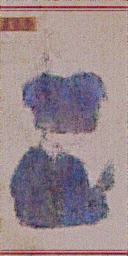

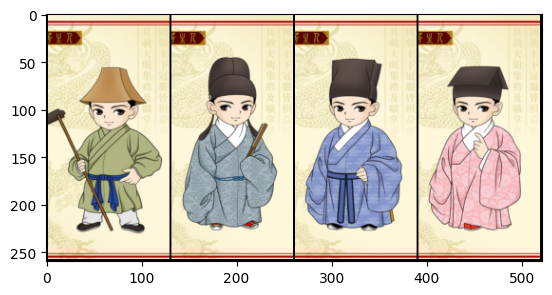

In [1]:
import random, os, tqdm, time, json
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")

random.seed(618)
np.random.seed(907)

new_base_path = os.path.join(
    "/mnt/d/forCoding_data",
    "/".join(
        os.getcwd().split("/")[-1*(len(sys.path[-1].split("/")) - 1):]
    ),
)
print("storage dir:", new_base_path)
print("code dir:", os.getcwd())

## 创建文件夹。
if not os.path.exists(new_base_path):
    os.makedirs(
        new_base_path
    )
if not os.path.exists(os.path.join(new_base_path, "preprocessedData")):
    os.makedirs(
        os.path.join(new_base_path, "preprocessedData")
    )
if not os.path.exists(os.path.join(new_base_path, "originalData")):
    os.makedirs(
        os.path.join(new_base_path, "originalData")
    )
if not os.path.exists(os.path.join(new_base_path, "trained_models")):
    os.makedirs(
        os.path.join(new_base_path, "trained_models")
    )

def create_originalData_path(filename_or_path):
    return os.path.join(new_base_path, "originalData", filename_or_path)
def create_preprocessedData_path(filename_or_path):
    return os.path.join(new_base_path, "preprocessedData", filename_or_path)
def create_trained_models_path(filename_or_path):
    return os.path.join(new_base_path, "trained_models", filename_or_path)

def millisec2datetime(timestamp):
    time_local = time.localtime(timestamp/1000)
    return time.strftime("%Y-%m-%d %H:%M:%S", time_local)
    
def run_finish():
    # 假设你的字体文件是 'myfont.ttf' 并且位于当前目录下  
    font = FontProperties(fname="/Users/minkexiu/Documents/GitHub/ML_Tryout/SimHei.ttf", size=24)  
    # 创建一个空白的图形  
    fig, ax = plt.subplots()  
    ax.imshow(
        plt.imread("/Users/minkexiu/Downloads/wallhaven-dgxpyg.jpg")
    )
    # 在图形中添加文字  
    ax.text(
        ax.get_xlim()[1] * 0.5, 
        ax.get_ylim()[0] * 0.5, 
        f"程序于这个点跑完：\n{millisec2datetime(time.time()*1000)}", fontproperties=font, ha="center", va="center", color="red"
    )  
    # 设置图形的布局  
    # ax.set_xlim(0, 1)  
    # ax.set_ylim(0, 1)  
    ax.set_xticks([])  
    ax.set_yticks([])  
    ax.patch.set_color("blue")
    # 显示图形  
    plt.show()
        
tqdm.tqdm.pandas() ## 引入这个，就可以在apply的时候用progress_apply了。

import IPython
def kill_current_kernel():
    '''杀死当前的kernel释放内存空间。'''
    IPython.Application.instance().kernel.do_shutdown(True) 
    
def simply_show_data(df1):
    print(df1.shape)
    display(df1.head())
    
def wait_flag(saved_flag_path, time_interval_sec=10):
    print("waiting for", saved_flag_path)
    time_count = 0
    while True:
        if os.path.exists(saved_flag_path):
            break
        time.sleep(time_interval_sec)
        time_count+=time_interval_sec
        print(time_count, end=" ")
    print("finish!!")

class TimerContext:  
    def __enter__(self):  
        self.start_time = str(datetime.now())
        print("start time:", self.start_time)
        return self  
    def __exit__(self, exc_type, exc_val, exc_tb):  
        print("start time:", self.start_time)
        print("end time", str(datetime.now()))

import torch
import torchvision
from torch import nn

device = torch.device("cuda")
print(f'Using device: {device}')

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

def show_images(x):
    """Given a batch of images x, make a grid and convert to PIL"""
    x = x * 0.5 + 0.5  # Map from (-1, 1) back to (0, 1)
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    plt.imshow(grid_im)
    
class HanfuDataset(Dataset): 
    def __init__(self, root_dir, transform=None):  
        self.root_dir = root_dir  
        self.image_paths = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir, f))]  
        self.transform = transform
        
    def __len__(self):  
        return len(self.image_paths)  

    def __getitem__(self, idx):  
        img_path = self.image_paths[idx]  
        image = Image.open(img_path)#.convert('L')  # 转换为灰度图片  
        if self.transform:  
            image = self.transform(image)  
        return image

# transform = transforms.Compose([  
#     transforms.Resize((140, 100)), ## 通道数为3.
#     transforms.CenterCrop((128, 64)),
#     transforms.ToTensor(),  
#     transforms.Normalize((0.5,), (0.5,))  # 灰度图片的归一化  
# ]) 
transform = transforms.Compose([  
    transforms.Resize((280, 200)), 
    transforms.CenterCrop((256, 128)),  # 原先是(128, 64)
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  
])

dataset = HanfuDataset(create_originalData_path("Q版大明衣冠图志/14 士庶巾服/"), transform)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)  

## 我们自己实现一遍corrupt：
def corrupt(x, amount):
    '''
    实际上是不同的图加的噪音程度不一样。
    就是说，给x加上amount程度的【正态分布noise】。
    '''
    ## 生成一个形状和x一样的正态分布随机数。
    noise = torch.randn_like(x)
    ## 接下来的部分是照抄的。
    amount = amount.view(-1, 1, 1, 1)
    return (1-amount) * x + amount * noise

# DDPM

from diffusers import DDPMScheduler, UNet2DModel
from datetime import datetime

train_dataloader = data_loader

for x in train_dataloader:
    break

show_images(x)

# How many runs through the data should we do?
n_epochs = 3

# Create the network
# net = UNet2DModel(
#     sample_size=(128, 64),  # the target image resolution
#     in_channels=3,  # the number of input channels, 3 for RGB images
#     out_channels=3,  # the number of output channels
#     layers_per_block=2,  # how many ResNet layers to use per UNet block
#     block_out_channels=(64, 128, 128, 256),  # More channels -> more parameters
#     down_block_types=(
#         "DownBlock2D",  # a regular ResNet downsampling block
#         "DownBlock2D",
#         "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
#         "AttnDownBlock2D",
#     ),
#     up_block_types=(
#         "AttnUpBlock2D",
#         "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
#         "UpBlock2D",
#         "UpBlock2D",  # a regular ResNet upsampling block
#     ),
# )
# net.to(device)

net = UNet2DModel(
    sample_size=(256, 128),  # 提高分辨率 原来是(128,64)其实就已经有一定的效果了。
    in_channels=3,  # 输入通道数，RGB 图像为 3
    out_channels=3,  # 输出通道数
    layers_per_block=2,  # 每个 UNet 块使用的 ResNet 层数
    block_out_channels=(64, 128, 256, 512),  # 增加通道数以增加参数
    down_block_types=(
        "DownBlock2D",
        "AttnDownBlock2D",  # 增加注意力块
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # 增加注意力块
        "UpBlock2D",
    ),
)
net.to(device)

sum([p.numel() for p in net.parameters()])

from diffusers import DDPMScheduler
    
noise_scheduler = DDPMScheduler(num_train_timesteps=1500)

# Our loss finction
loss_fn = nn.MSELoss()

# The optimizer
opt = torch.optim.Adam(net.parameters(), lr=1e-5) 

# Keeping a record of the losses for later viewing
losses = []

# The training loop
with TimerContext():
    for epoch in range(300):
    
        for x in train_dataloader:
    
            # Get some data and prepare the corrupted version
            x = x.to(device) # Data on the GPU
            noise = torch.randn(x.shape).to(x.device)
            bs = x.shape[0]

            # Sample a random timestep for each image
            timesteps = torch.randint(
                0, 
                noise_scheduler.num_train_timesteps, ## 前两个参数指的是生成数组的取值范围？
                (bs,), ## 这个是数组的长度？
                device=x.device
            ).long()

            # Add noise to the clean images according to the noise magnitude at each timestep
            noisy_images = noise_scheduler.add_noise(x, noise, timesteps)

            noise_pred = net(noisy_images, timesteps, return_dict=False)[0]

            # Calculate the loss
            loss = loss_fn(noise_pred, noise) 
    
            # Backprop and update the params:
            opt.zero_grad()
            loss.backward()
            opt.step()
    
            # Store the loss for later
            losses.append(loss.item())
    
        # Print our the average of the loss values for this epoch:
        avg_loss = sum(losses[-len(train_dataloader):])/len(train_dataloader)
        print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')

from diffusers import DDPMPipeline
image_pipe = DDPMPipeline(unet=net, scheduler=noise_scheduler)

# 保存DDPM模型
model_save_path = "./saved_ddpm_model"
image_pipe.save_pretrained(model_save_path)
print(f"DDPM模型已成功保存到{model_save_path}目录")

# # 加载DDPM模型（示例代码）
# print("\n加载已保存的DDPM模型...")
# loaded_pipe = DDPMPipeline.from_pretrained(model_save_path)
# print(f"DDPM模型已成功从{model_save_path}目录加载")

pipeline_output = image_pipe()
pipeline_output.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

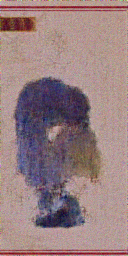

In [2]:
pipeline_output = image_pipe()
pipeline_output.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

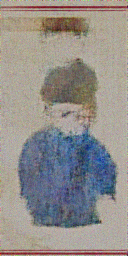

In [3]:
pipeline_output = image_pipe()
pipeline_output.images[0]



  0%|          | 0/1000 [00:00<?, ?it/s]

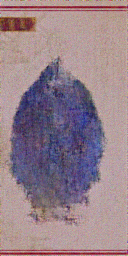

  0%|          | 0/1000 [00:00<?, ?it/s]

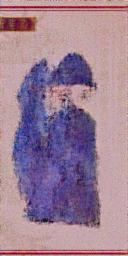

  0%|          | 0/1000 [00:00<?, ?it/s]

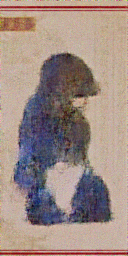

  0%|          | 0/1000 [00:00<?, ?it/s]

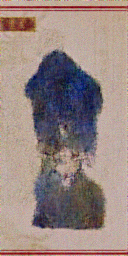

  0%|          | 0/1000 [00:00<?, ?it/s]

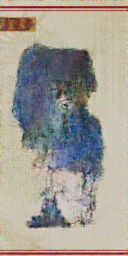

In [10]:
for _ in range(5):
    pipeline_output = image_pipe()
    display(
        pipeline_output.images[0]
    )

  0%|          | 0/1000 [00:00<?, ?it/s]

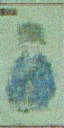

In [13]:
pipeline_output = image_pipe()
pipeline_output.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

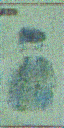

In [14]:
pipeline_output = image_pipe()
pipeline_output.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

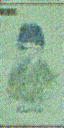

In [15]:
pipeline_output = image_pipe()
pipeline_output.images[0]

findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Fon


在Jupyter Notebook中显示并放大图片：


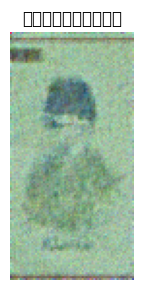


提示：如需进一步放大，可以调整figsize参数值，数值越大图像显示越大


In [17]:
# 在Jupyter Notebook中放大显示图片
import matplotlib.pyplot as plt

# # 设置中文字体支持
# plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

# 方法1：直接显示并调整大小
print("\n在Jupyter Notebook中显示并放大图片：")
plt.figure(figsize=(6, 3))  # 设置图像大小，(宽度, 高度)单位为英寸
plt.imshow(pipeline_output.images[0])
plt.axis('off')  # 关闭坐标轴
plt.title("高质量生成的汉服图像")
plt.tight_layout()  # 调整布局
plt.show()

# 方法2：如果需要保存高清图像
# advanced_output.images[0].save("generated_hanfu_highres.png", dpi=300)

print("\n提示：如需进一步放大，可以调整figsize参数值，数值越大图像显示越大")